In [1]:
import pandas as pd
import numpy as np

## Domestic

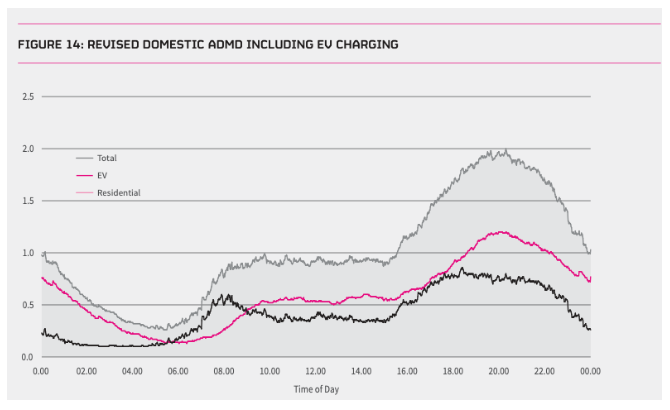

### Extract from plots

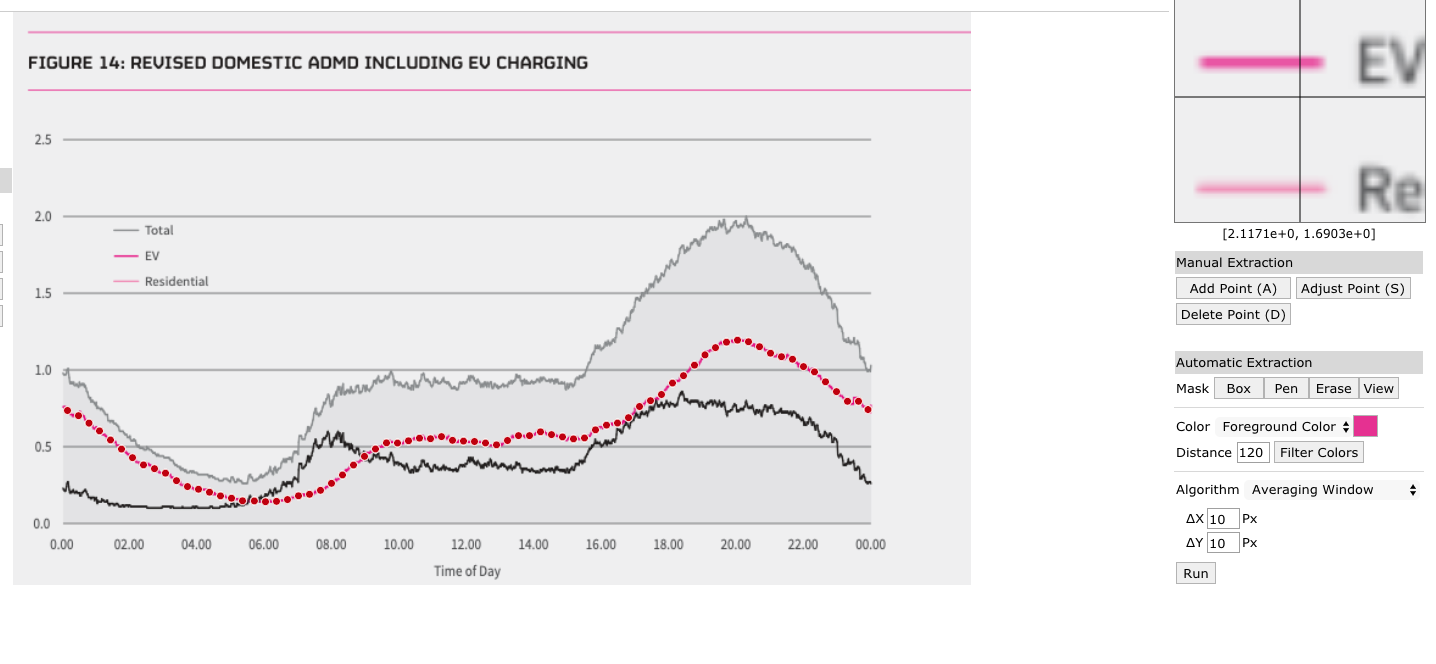

In [17]:
df = pd.read_csv('domestic.csv', header=None, names=['hour', 'domestic']).set_index('hour')
df.head()

,domestic
hour,
0.142,0.730
0.469,0.696
0.780,0.647
1.090,0.596
1.420,0.537


In [18]:
df = df [ ~ df.index.duplicated() ]
df =  ( df.reindex(
        df.index.unique().union( range(0,25) ) )
        .interpolate()
        .reindex( range(0,25) , )
      )
df = df.dropna()
df.head()

,domestic
1,0.6215
2,0.4500
3,0.3355
4,0.2245
5,0.1645


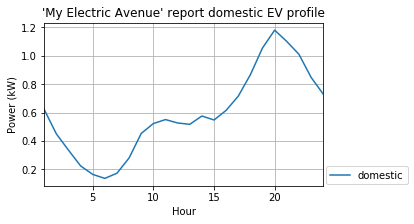

In [19]:
ax = ( df.plot(title='\'My Electric Avenue\' report domestic EV profile',
                   grid=True,
                   figsize=(5,3)) )
ax.legend(loc=(1.01, 0.01))
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [20]:
df = df.dropna(how='all')

In [21]:
len(df)

24

In [22]:
one_year = np.tile(df['domestic'], 52*7)

In [24]:
len(one_year)

8736

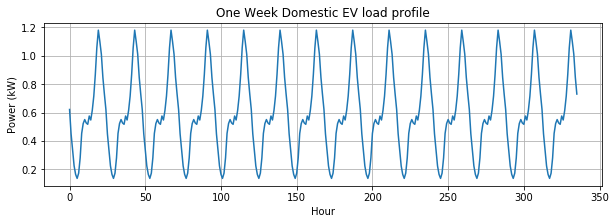

In [25]:
ax = ( pd.Series(one_year)[:24*14].plot(title='One Week Domestic EV load profile',
                   grid=True,
                   figsize=(10,3)) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [34]:
df = pd.DataFrame(one_year)
df.columns = ['domestic']
df

,domestic
0,0.6215
1,0.4500
2,0.3355
3,0.2245
4,0.1645
...,...
8731,1.1800
8732,1.1000
8733,1.0100
8734,0.8480


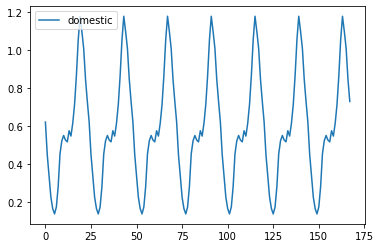

In [37]:
df[:24*7].plot()

In [38]:
df.to_csv('../cleaned/my_electric_avenue_profiles.csv')

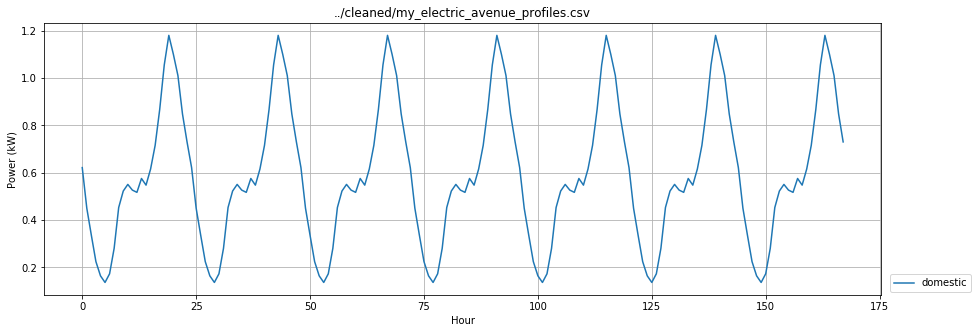

In [39]:
ax = ( df[:7*24].plot(title='../cleaned/my_electric_avenue_profiles.csv',
                   grid=True,
                   figsize=(15,5)) )
ax.legend(loc=(1.01, 0.01))
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')